In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [25]:
df = pd.read_csv("/data/cleaned/processed_raw_CareerMapping_with_scores.csv")

In [26]:
X = df.drop(['Role', 'Role_encoded'], axis=1)

In [27]:
y = df['Role_encoded']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
print(f"Số lượng mẫu ban đầu của tập Train: {Counter(y_train)}")

Số lượng mẫu ban đầu của tập Train: Counter({0: 851, 11: 445, 12: 430, 13: 424, 2: 417, 5: 417, 3: 406, 7: 392, 8: 389, 14: 387, 15: 386, 9: 381, 6: 379, 1: 379, 4: 377, 10: 362})


In [30]:
smote = SMOTE(random_state=42)

In [31]:
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [32]:
print(f"Số lượng mẫu sau khi SMOTE: {Counter(y_train_resampled)}")

Số lượng mẫu sau khi SMOTE: Counter({3: 851, 8: 851, 13: 851, 7: 851, 15: 851, 14: 851, 4: 851, 2: 851, 6: 851, 11: 851, 5: 851, 1: 851, 9: 851, 12: 851, 0: 851, 10: 851})


In [33]:
knn_pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5))
knn_pipeline.fit(X_train_resampled, y_train_resampled)
y_pred = knn_pipeline.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy: {acc}")

KNN Accuracy: 0.9519343493552169


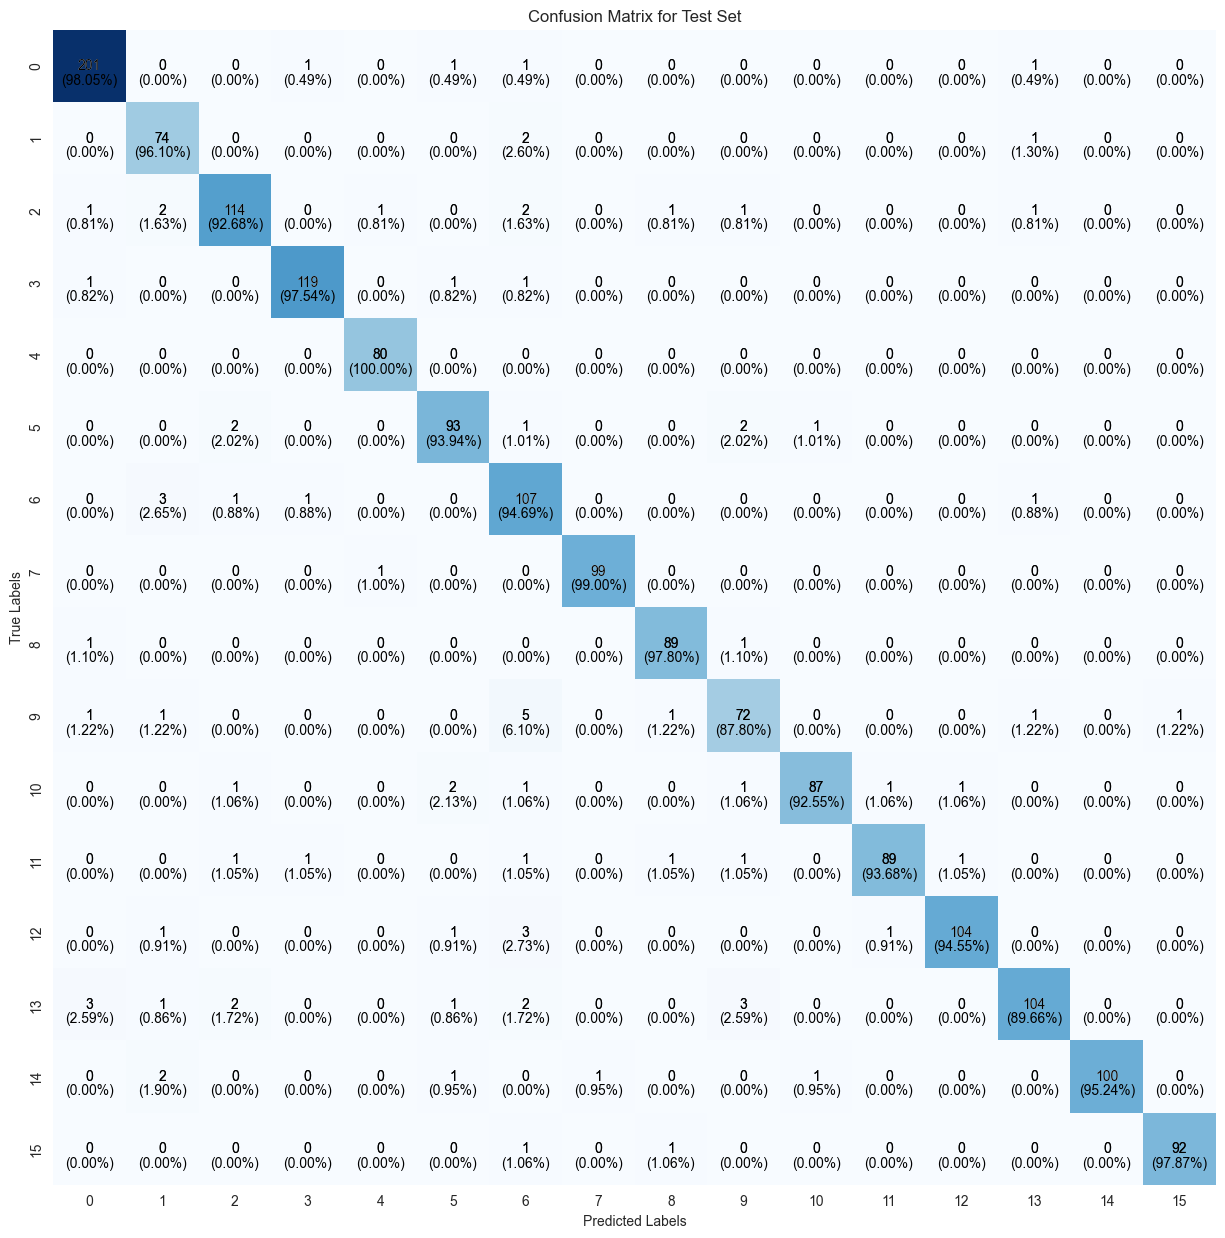

In [34]:
conf_matrix = confusion_matrix(y_test, y_pred)
row_sums = conf_matrix.sum(axis=1, keepdims=True)
conf_matrix_percent = conf_matrix / row_sums * 100
#print(conf_matrix_percent)

plt.figure(figsize=(15, 15))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)


for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j + 0.5, i + 0.5, f"{conf_matrix[i, j]}",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)
        plt.text(j + 0.5, i + 0.7, f"({conf_matrix_percent[i, j]:.2f}%)",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Test Set')
plt.show()

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       205
           1       0.88      0.96      0.92        77
           2       0.94      0.93      0.93       123
           3       0.98      0.98      0.98       122
           4       0.98      1.00      0.99        80
           5       0.93      0.94      0.93        99
           6       0.84      0.95      0.89       113
           7       0.99      0.99      0.99       100
           8       0.96      0.98      0.97        91
           9       0.89      0.88      0.88        82
          10       0.98      0.93      0.95        94
          11       0.98      0.94      0.96        95
          12       0.98      0.95      0.96       110
          13       0.95      0.90      0.92       116
          14       1.00      0.95      0.98       105
          15       0.99      0.98      0.98        94

    accuracy                           0.95      1706
   macro avg       0.95   

----------------------------------------------------------------------------------------------------------------------------------------

In [36]:
df = pd.read_csv("/data/cleaned/processed_raw_CareerMapping.csv")

In [37]:
X = df.drop(['Role', 'Role_encoded'], axis=1)

In [38]:
y = df['Role_encoded']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
print(f"Số lượng mẫu ban đầu của tập Train: {Counter(y_train)}")

Số lượng mẫu ban đầu của tập Train: Counter({0: 851, 11: 445, 12: 430, 13: 424, 2: 417, 5: 417, 3: 406, 7: 392, 8: 389, 14: 387, 15: 386, 9: 381, 6: 379, 1: 379, 4: 377, 10: 362})


In [41]:
smote = SMOTE(random_state=42)

In [42]:
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [43]:
print(f"Số lượng mẫu sau khi SMOTE: {Counter(y_train_resampled)}")

Số lượng mẫu sau khi SMOTE: Counter({3: 851, 8: 851, 13: 851, 7: 851, 15: 851, 14: 851, 4: 851, 2: 851, 6: 851, 11: 851, 5: 851, 1: 851, 9: 851, 12: 851, 0: 851, 10: 851})


In [44]:
knn_pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5))
knn_pipeline.fit(X_train_resampled, y_train_resampled)
y_pred = knn_pipeline.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy: {acc}")

KNN Accuracy: 0.9507620164126612


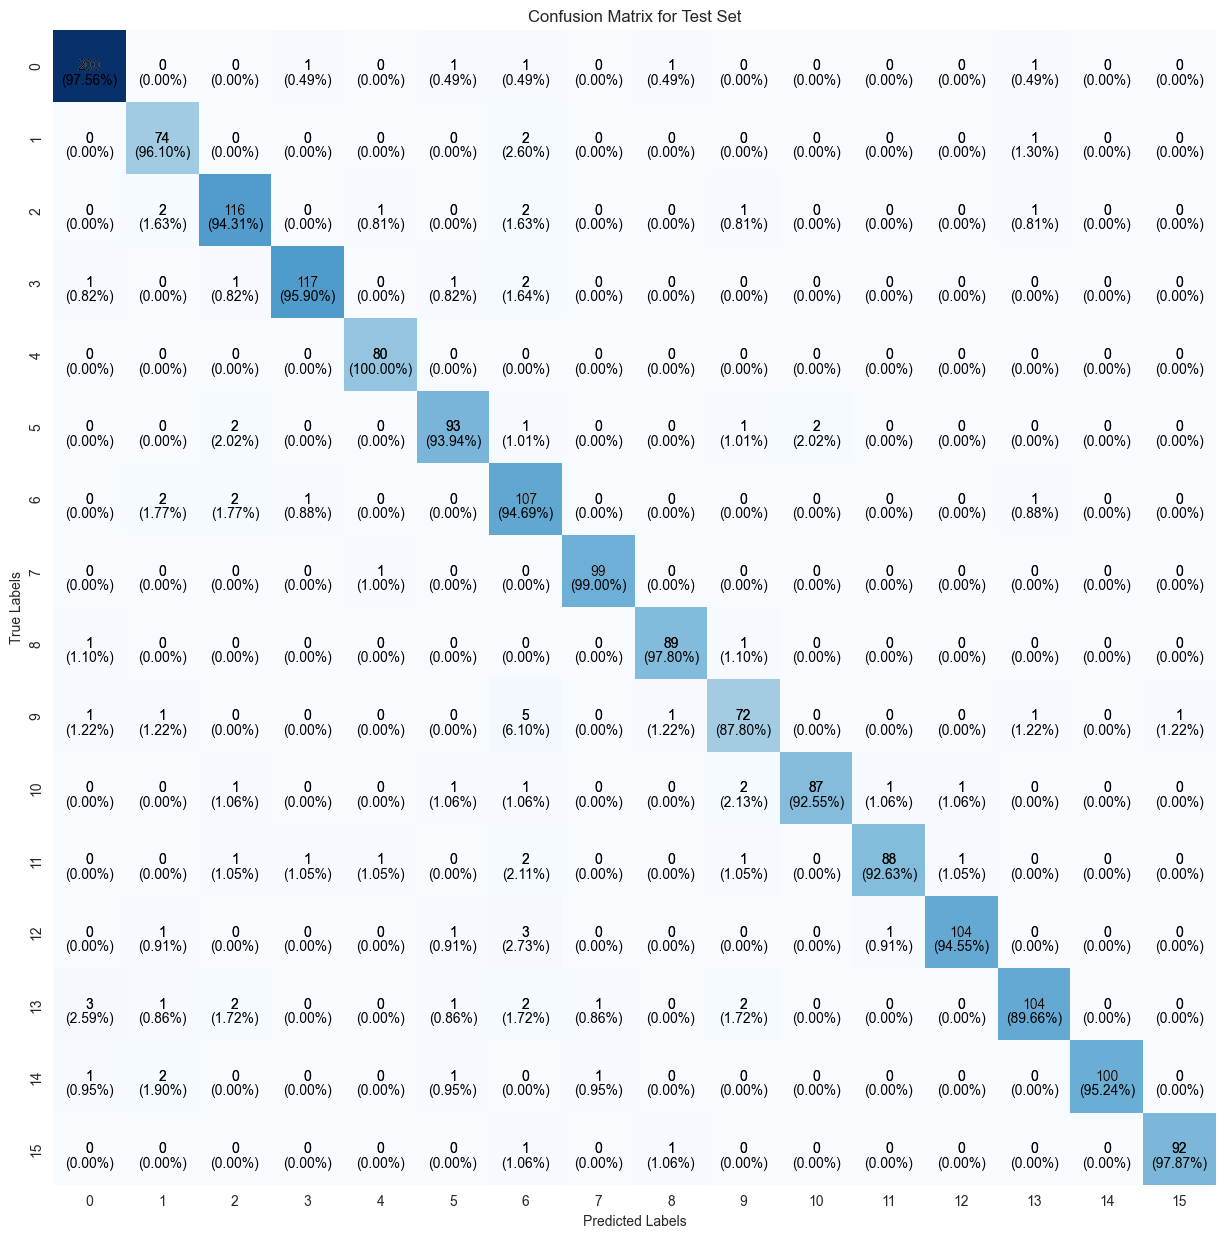

In [45]:
conf_matrix = confusion_matrix(y_test, y_pred)
row_sums = conf_matrix.sum(axis=1, keepdims=True)
conf_matrix_percent = conf_matrix / row_sums * 100
#print(conf_matrix_percent)

plt.figure(figsize=(15, 15))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)


for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j + 0.5, i + 0.5, f"{conf_matrix[i, j]}",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)
        plt.text(j + 0.5, i + 0.7, f"({conf_matrix_percent[i, j]:.2f}%)",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Test Set')
plt.show()

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       205
           1       0.89      0.96      0.93        77
           2       0.93      0.94      0.94       123
           3       0.97      0.96      0.97       122
           4       0.96      1.00      0.98        80
           5       0.94      0.94      0.94        99
           6       0.83      0.95      0.88       113
           7       0.98      0.99      0.99       100
           8       0.97      0.98      0.97        91
           9       0.90      0.88      0.89        82
          10       0.98      0.93      0.95        94
          11       0.98      0.93      0.95        95
          12       0.98      0.95      0.96       110
          13       0.95      0.90      0.92       116
          14       1.00      0.95      0.98       105
          15       0.99      0.98      0.98        94

    accuracy                           0.95      1706
   macro avg       0.95   